<a href="https://colab.research.google.com/github/gbiamgaurav/DeepLearning-Implementations/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"6c5e2ca88e0e1332c5c4009c0a01fc76"}'}

In [74]:
## Create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [75]:
## Copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [76]:
## Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [77]:
!kaggle datasets download -d shrutimechlearn/churn-modelling

churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
!unzip /content/churn-modelling.zip

Archive:  /content/churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Churn_Modelling.csv     


In [79]:
#!pip install tensorflow

In [80]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [81]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [83]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df = dataset.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
## Divide the dataset into independent and dependent features

X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

In [86]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [87]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [88]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)

gender = pd.get_dummies(X['Gender'], drop_first=True)

In [89]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [90]:
## Concatenate these variables to the dataframe

X = X.drop(['Geography', 'Gender'], axis=1)

In [91]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [92]:
X = pd.concat([X, geography, gender], axis=1)

In [93]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [94]:
## Splitting the dataset into Training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print(f"Shape of Training data: ", X_train.shape)
print(f"Shape of Test data: ", X_test.shape)

Shape of Training data:  (8000, 11)
Shape of Test data:  (2000, 11)


In [96]:
## Feature Scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [98]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [99]:
X_train.shape

(8000, 11)

In [100]:
## Let's create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [101]:
## Lets initialize the ANN

classifier = Sequential()

In [102]:
## Adding the input layer

classifier.add(Dense(units=11, activation='relu'))

In [103]:
## Adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [104]:
## Adding 2nd hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [105]:
## Adding the Output layer

classifier.add(Dense(1, activation='sigmoid'))

In [106]:
classifier.compile(optimizer='adam', loss='BinaryCrossentropy',metrics=['accuracy'])

In [107]:
import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [108]:
## Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [109]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5077 - accuracy: 0.7962 - val_loss: 0.4684 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4614 - accuracy: 0.7962 - val_loss: 0.4509 - val_accuracy: 0.7910
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4468 - accuracy: 0.7962 - val_loss: 0.4443 - val_accuracy: 0.7910
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4392 - accuracy: 0.7962 - val_loss: 0.4384 - val_accuracy: 0.7910
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4339 - accuracy: 0.7962 - val_loss: 0.4341 - val_accuracy: 0.7910
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4271 - accuracy: 0.7962 - val_loss: 0.4275 - val_accuracy: 0.7910
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4196 - accuracy: 0.7962 - val_loss: 0.4241 - val_accuracy:

In [110]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

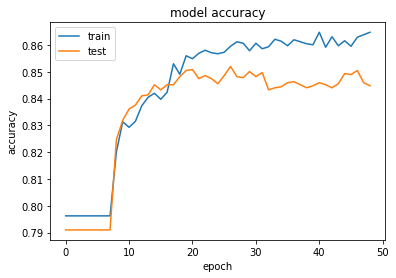

In [111]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

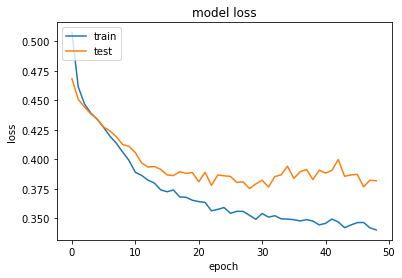

In [112]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
## Making the Predictions and evaluating the model

## Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [114]:
## Make the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1515,   92],
       [ 214,  179]])

In [115]:
## Calculate the accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)

print(f'Score of our ANN model: ', score)

Score of our ANN model:  0.847


In [116]:
## Get the weights

classifier.get_weights()

[array([[-1.36091486e-01,  5.81666231e-02,  2.05060035e-01,
         -2.48822607e-02,  8.64411704e-04,  4.60832864e-02,
          1.46268366e-03,  4.51232195e-02,  4.10587452e-02,
         -2.12984718e-02,  2.09587649e-01],
        [ 5.23108900e-01,  1.92167312e-01,  2.17781663e-01,
         -7.74330795e-01, -5.28703630e-01, -1.20181441e-01,
         -6.88603461e-01,  1.40557528e-01,  6.64316237e-01,
         -8.07779208e-02, -1.65210038e-01],
        [ 1.06002152e-01, -1.68414954e-02,  1.44486934e-01,
          1.21930346e-03, -2.32477412e-01,  5.68758436e-02,
         -7.63854608e-02, -9.47989151e-02, -1.18882112e-01,
         -1.36003625e-02,  9.06282142e-02],
        [-1.15495615e-01, -2.82842875e-01, -2.05868259e-01,
         -9.47267115e-02, -2.01226428e-01,  3.40105683e-01,
          1.82396784e-01,  3.72118533e-01,  4.84586991e-02,
          2.95394063e-01,  1.38194785e-01],
        [ 8.25180635e-02, -1.31571507e+00,  6.11137599e-02,
          1.94559284e-02,  2.70687878e-01, -